<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
    <i>Aprender una técnica no es un fin en si mismo, simplemente indica por donde hay que empezar</i><br><b>Proverbio Japonés</b></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<i>Material curado y organizado por el Prof. Dr. Hernán D. Merlino</i><br> 
<i>Rescalado de Características & Principal Component Analysis (PCA) Versión 1.0 - 2022 Q1</i></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Rescalado de Características</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
En ciertas ocaciones rescalar las caractersíticas mejora el proceso de PCA.</p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Bibliotecas necesarias para ejecutar el notebook</strong><br> 
<ol style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<li>pandas</li> 
<li>numpy</li> 
<li>matplotlib</li>
<li>seaborn</li>
<li>sklearn</li> 
</ol>
</p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Validación de entorno</strong></p> 

In [93]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.0.1
ipykernel        : 5.3.4
ipywidgets       : 7.6.5
jupyter_client   : 7.1.2
jupyter_core     : 4.9.1
jupyter_server   : not installed
jupyterlab       : 2.2.9
nbclient         : 0.5.10
nbconvert        : 6.5.0
nbformat         : 5.1.3
notebook         : 6.1.6
qtconsole        : 5.2.2
traitlets        : 5.1.1


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cargar librerias Pandas y Numpy</strong></p> 

In [94]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.0.5


In [95]:
import numpy as np
np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.19.5


In [96]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.5.1


In [97]:
# En produccion eliminar, se incluye por informacion
import sklearn
print(f'Sklearn version: {sklearn.__version__}')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer

Sklearn version: 0.23.2


In [98]:
# En produccion eliminar, se incluye por informacion
import seaborn as sns
print(f'Seaborn version: {sns.__version__}')

Seaborn version: 0.11.2


In [99]:
import warnings
warnings.filterwarnings("ignore")

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>____________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Lectura de archivo de datos y análisis exploratorio no visual</strong></p> 

In [100]:
df = sns.load_dataset('iris')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count       150.000      150.000       150.000      150.000
mean          5.843        3.057         3.758        1.199
std           0.828        0.436         1.765        0.762
min           4.300        2.000         1.000        0.100
25%           5.100        2.800         1.600        0.300
50%           5.800        3.000         4.350        1.300
75%           6.400        3.300         5.100        1.800
max           7.900        4.400         6.900        2.500

In [103]:
df['species'] = pd.Categorical(df['species'])

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Visualizar el dataset</strong></p>

In [104]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [105]:
df.sample(5)

sepal_length  sepal_width  petal_length  petal_width     species
51            6.4          3.2           4.5          1.5  versicolor
70            5.9          3.2           4.8          1.8  versicolor
129           7.2          3.0           5.8          1.6   virginica
32            5.2          4.1           1.5          0.1      setosa
124           6.7          3.3           5.7          2.1   virginica

In [106]:
df.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [107]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length         1.000       -0.118         0.872        0.818
sepal_width         -0.118        1.000        -0.428       -0.366
petal_length         0.872       -0.428         1.000        0.963
petal_width          0.818       -0.366         0.963        1.000

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>____________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación de datos para entrenamiento</strong></p> 

In [108]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Xdf = df.loc[:, features].values
y = df.loc[:,['species']].values

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cantidad de Componentes para el PCA</strong></p> 

In [109]:
iComponents = 2

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>____________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Solo se aplica PCA</strong></p> 

In [110]:
pca = PCA(n_components=iComponents)

In [111]:
%%time
pca_Components = pca.fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 0 ns


In [112]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)

In [113]:
df_PCA2.head()

PCA0   PCA1 species
0 -2.684  0.319  setosa
1 -2.714 -0.177  setosa
2 -2.889 -0.145  setosa
3 -2.745 -0.318  setosa
4 -2.729  0.327  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características sin rescalar calculadas mediante PCA</strong></p> 

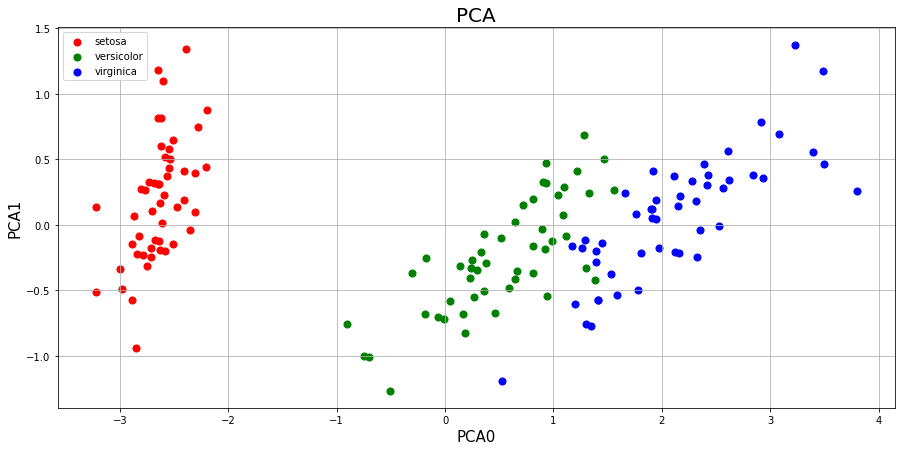

In [114]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_PCA2['species'] == target
    ax.scatter(df_PCA2.loc[indicesToKeep, 'PCA0'], df_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>____________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>StandardScaler & PCA</strong></p> 

In [115]:
%%time
x = StandardScaler().fit_transform(Xdf)

CPU times: total: 31.2 ms
Wall time: 2 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [116]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000        5.000
mean         -1.191        0.513        -1.340       -1.315
std           0.251        0.596         0.040        0.000
min          -1.507       -0.132        -1.397       -1.315
5%           -1.482       -0.086        -1.386       -1.315
25%          -1.385        0.098        -1.340       -1.315
50%          -1.143        0.328        -1.340       -1.315
75%          -1.022        1.019        -1.340       -1.315
95%          -0.925        1.203        -1.295       -1.315
max          -0.901        1.249        -1.283       -1.315

In [117]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0        -0.901        1.019        -1.340       -1.315
1        -1.143       -0.132        -1.340       -1.315
2        -1.385        0.328        -1.397       -1.315
3        -1.507        0.098        -1.283       -1.315
4        -1.022        1.249        -1.340       -1.315

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [118]:
pca = PCA(n_components=iComponents)

In [119]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 0 ns


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [120]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_Scaled_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_Scaled_PCA2.head()

PCA0   PCA1 species
0 -2.265  0.480  setosa
1 -2.081 -0.674  setosa
2 -2.364 -0.342  setosa
3 -2.299 -0.597  setosa
4 -2.390  0.647  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

In [121]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('StandardScaler & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_Scaled_PCA2['species'] == target
    ax.scatter(df_Scaled_PCA2.loc[indicesToKeep, 'PCA0'], df_Scaled_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>MinMaxScaler & PCA</strong></p> 

In [122]:
%%time
x = MinMaxScaler().fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 1.01 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [123]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000        5.000
mean          0.156        0.533         0.068        0.042
std           0.058        0.108         0.012        0.000
min           0.083        0.417         0.051        0.042
5%            0.089        0.425         0.054        0.042
25%           0.111        0.458         0.068        0.042
50%           0.167        0.500         0.068        0.042
75%           0.194        0.625         0.068        0.042
95%           0.217        0.658         0.081        0.042
max           0.222        0.667         0.085        0.042

In [124]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0         0.222        0.625         0.068        0.042
1         0.167        0.417         0.068        0.042
2         0.111        0.500         0.051        0.042
3         0.083        0.458         0.085        0.042
4         0.194        0.667         0.068        0.042

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [125]:
pca = PCA(n_components=iComponents)

In [126]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 1.04 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [127]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_MinMax_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_MinMax_PCA2.head()

PCA0   PCA1 species
0 -0.631  0.108  setosa
1 -0.623 -0.104  setosa
2 -0.670 -0.051  setosa
3 -0.654 -0.103  setosa
4 -0.649  0.133  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

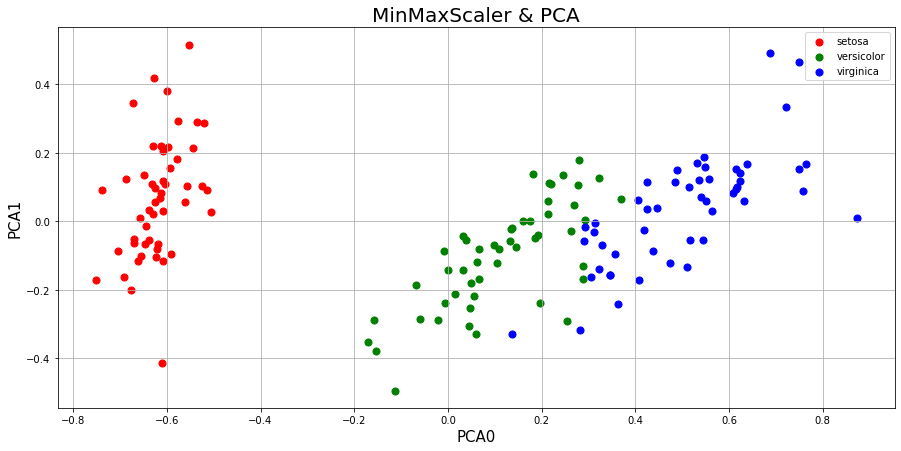

In [128]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('MinMaxScaler & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_MinMax_PCA2['species'] == target
    ax.scatter(df_MinMax_PCA2.loc[indicesToKeep, 'PCA0'], df_MinMax_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>MaxAbsScaler & PCA</strong></p> 

In [129]:
%%time
x = MaxAbsScaler().fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 0 ns


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [130]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000         5.00
mean          0.615        0.745         0.203         0.08
std           0.026        0.059         0.010         0.00
min           0.582        0.682         0.188         0.08
5%            0.585        0.686         0.191         0.08
25%           0.595        0.705         0.203         0.08
50%           0.620        0.727         0.203         0.08
75%           0.633        0.795         0.203         0.08
95%           0.643        0.814         0.214         0.08
max           0.646        0.818         0.217         0.08

In [131]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0         0.646        0.795         0.203         0.08
1         0.620        0.682         0.203         0.08
2         0.595        0.727         0.188         0.08
3         0.582        0.705         0.217         0.08
4         0.633        0.818         0.203         0.08

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [132]:
pca = PCA(n_components=iComponents)

In [133]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 0 ns


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [134]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_MaxAbs_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_MaxAbs_PCA2.head()

PCA0   PCA1 species
0 -0.541  0.053  setosa
1 -0.535 -0.061  setosa
2 -0.554 -0.026  setosa
3 -0.537 -0.054  setosa
4 -0.546  0.071  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

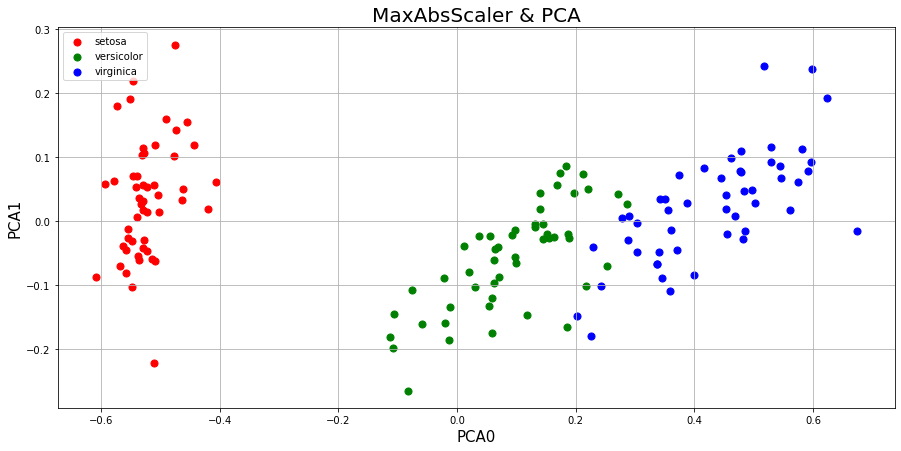

In [135]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('MaxAbsScaler & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_MaxAbs_PCA2['species'] == target
    ax.scatter(df_MaxAbs_PCA2.loc[indicesToKeep, 'PCA0'], df_MaxAbs_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>PowerTransformer & PCA</strong></p> 

In [136]:
%%time
x = PowerTransformer().fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 8.86 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [137]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000        5.000
mean         -1.250        0.539        -1.332       -1.332
std           0.311        0.565         0.038        0.000
min          -1.645       -0.082        -1.386       -1.332
5%           -1.613       -0.036        -1.375       -1.332
25%          -1.488        0.149        -1.332       -1.332
50%          -1.185        0.375        -1.332       -1.332
75%          -1.039        1.023        -1.332       -1.332
95%          -0.924        1.188        -1.289       -1.332
max          -0.896        1.230        -1.278       -1.332

In [138]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0        -0.896        1.023        -1.332       -1.332
1        -1.185       -0.082        -1.332       -1.332
2        -1.488        0.375        -1.386       -1.332
3        -1.645        0.149        -1.278       -1.332
4        -1.039        1.230        -1.332       -1.332

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [139]:
pca = PCA(n_components=iComponents)

In [140]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 1 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [141]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_PowerTransformer_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_PowerTransformer_PCA2.head()

PCA0   PCA1 species
0 -2.263 -0.505  setosa
1 -2.127  0.627  setosa
2 -2.437  0.313  setosa
3 -2.398  0.576  setosa
4 -2.392 -0.646  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

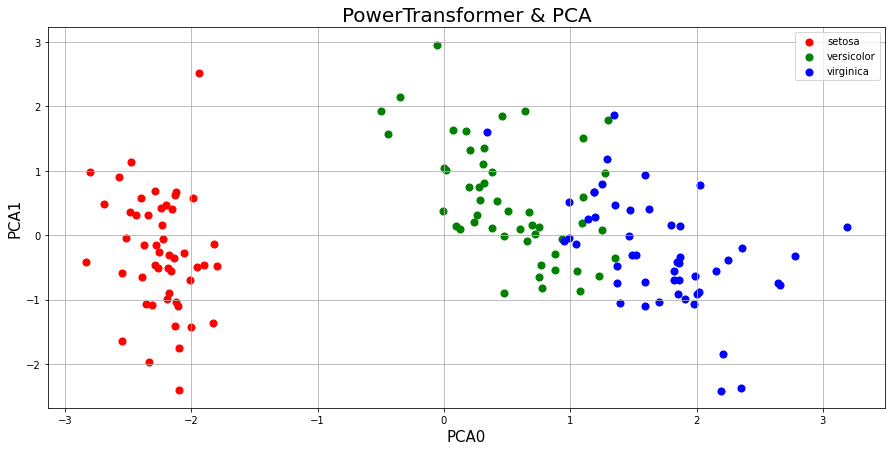

In [142]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('PowerTransformer & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_PowerTransformer_PCA2['species'] == target
    ax.scatter(df_PowerTransformer_PCA2.loc[indicesToKeep, 'PCA0'], df_PowerTransformer_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>RobustScaler & PCA</strong></p> 

In [143]:
%%time
x = RobustScaler().fit_transform(Xdf)

CPU times: total: 31.2 ms
Wall time: 3.01 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [144]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000        5.000
mean         -0.723        0.560        -0.843       -0.733
std           0.160        0.518         0.020        0.000
min          -0.923        0.000        -0.871       -0.733
5%           -0.908        0.040        -0.866       -0.733
25%          -0.846        0.200        -0.843       -0.733
50%          -0.692        0.400        -0.843       -0.733
75%          -0.615        1.000        -0.843       -0.733
95%          -0.554        1.160        -0.820       -0.733
max          -0.538        1.200        -0.814       -0.733

In [145]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0        -0.538          1.0        -0.843       -0.733
1        -0.692          0.0        -0.843       -0.733
2        -0.846          0.4        -0.871       -0.733
3        -0.923          0.2        -0.814       -0.733
4        -0.615          1.2        -0.843       -0.733

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [146]:
pca = PCA(n_components=iComponents)

In [147]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 0 ns


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [148]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_RobustScaler_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_RobustScaler_PCA2.head()

PCA0   PCA1 species
0  1.414 -0.024  setosa
1  0.831 -0.849  setosa
2  1.172 -0.646  setosa
3  1.051 -0.822  setosa
4  1.578  0.081  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

In [149]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('RobustScaler & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_RobustScaler_PCA2['species'] == target
    ax.scatter(df_RobustScaler_PCA2.loc[indicesToKeep, 'PCA0'], df_RobustScaler_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>QuantileTransformer (normal) & PCA</strong></p> 

In [150]:
%%time
x = QuantileTransformer(output_distribution='normal').fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 7.03 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [151]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000        5.000
mean         -1.203        0.574        -1.225       -1.138
std           0.416        0.554         0.298        0.000
min          -1.710       -0.084        -1.675       -1.138
5%           -1.673       -0.022        -1.581       -1.138
25%          -1.524        0.229        -1.205       -1.138
50%          -1.154        0.443        -1.205       -1.138
75%          -0.924        1.061        -1.205       -1.138
95%          -0.746        1.190        -0.910       -1.138
max          -0.701        1.223        -0.837       -1.138

In [152]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0        -0.701        1.061        -1.205       -1.138
1        -1.154       -0.084        -1.205       -1.138
2        -1.524        0.443        -1.675       -1.138
3        -1.710        0.229        -0.837       -1.138
4        -0.924        1.223        -1.205       -1.138

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [153]:
pca = PCA(n_components=iComponents)

In [154]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 0 ns


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [155]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_QuantileTransformer_Normal_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_QuantileTransformer_Normal_PCA2.head()

PCA0   PCA1 species
0  1.879 -0.840  setosa
1  1.938  0.371  setosa
2  2.441 -0.083  setosa
3  2.069  0.200  setosa
4  2.013 -0.949  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

In [156]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('QuantileTransformer (Normal) & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_QuantileTransformer_Normal_PCA2['species'] == target
    ax.scatter(df_QuantileTransformer_Normal_PCA2.loc[indicesToKeep, 'PCA0'], df_QuantileTransformer_Normal_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>QuantileTransformer (uniform) & PCA</strong></p> 

In [157]:
%%time
x = QuantileTransformer(output_distribution='uniform').fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 1.96 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [158]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000        5.000
mean          0.130        0.695         0.118        0.128
std           0.082        0.178         0.055        0.000
min           0.044        0.466         0.047        0.128
5%            0.048        0.491         0.060        0.128
25%           0.064        0.591         0.114        0.128
50%           0.124        0.671         0.114        0.128
75%           0.178        0.856         0.114        0.128
95%           0.229        0.883         0.184        0.128
max           0.242        0.889         0.201        0.128

In [159]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0         0.242        0.856         0.114        0.128
1         0.124        0.466         0.114        0.128
2         0.064        0.671         0.047        0.128
3         0.044        0.591         0.201        0.128
4         0.178        0.889         0.114        0.128

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [160]:
pca = PCA(n_components=iComponents)

In [161]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 995 µs


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [162]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_QuantileTransformer_Uniform_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_QuantileTransformer_Uniform_PCA2.head()

PCA0   PCA1 species
0 -0.655 -0.221  setosa
1 -0.630  0.183  setosa
2 -0.748  0.005  setosa
3 -0.652  0.076  setosa
4 -0.698 -0.238  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

In [163]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('QuantileTransformer (uniform) & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_QuantileTransformer_Uniform_PCA2['species'] == target
    ax.scatter(df_QuantileTransformer_Uniform_PCA2.loc[indicesToKeep, 'PCA0'], df_QuantileTransformer_Uniform_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Normalizer (L1) & PCA</strong></p> 

In [164]:
%%time
x = Normalizer(norm='l1').fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 1 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [165]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000    5.000e+00
mean          0.499        0.336         0.144    2.056e-02
std           0.011        0.014         0.010    8.779e-04
min           0.489        0.316         0.137    1.961e-02
5%            0.490        0.319         0.137    1.961e-02
25%           0.490        0.330         0.137    1.961e-02
50%           0.500        0.340         0.138    2.105e-02
75%           0.500        0.343         0.147    2.128e-02
95%           0.513        0.351         0.157    2.128e-02
max           0.516        0.353         0.160    2.128e-02

In [166]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0         0.500        0.343         0.137        0.020
1         0.516        0.316         0.147        0.021
2         0.500        0.340         0.138        0.021
3         0.489        0.330         0.160        0.021
4         0.490        0.353         0.137        0.020

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [167]:
pca = PCA(n_components=iComponents)

In [168]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 2.01 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [169]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_Normalizer_L1_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_Normalizer_L1_PCA2.head()

PCA0       PCA1 species
0  0.184  8.270e-04  setosa
1  0.166  2.801e-02  setosa
2  0.181  1.790e-03  setosa
3  0.157  2.102e-03  setosa
4  0.186 -1.177e-02  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

In [170]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('Normalizer (L1) & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_Normalizer_L1_PCA2['species'] == target
    ax.scatter(df_Normalizer_L1_PCA2.loc[indicesToKeep, 'PCA0'], df_Normalizer_L1_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Normalizer (L2) & PCA</strong></p> 

In [171]:
%%time
x = Normalizer(norm='l2').fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 941 µs


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [172]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count         5.000        5.000         5.000        5.000
mean          0.806        0.543         0.232        0.033
std           0.014        0.023         0.017        0.002
min           0.791        0.507         0.221        0.032
5%            0.793        0.513         0.221        0.032
25%           0.800        0.539         0.221        0.032
50%           0.804        0.548         0.223        0.034
75%           0.805        0.552         0.237        0.034
95%           0.824        0.566         0.256        0.035
max           0.828        0.569         0.261        0.035

In [173]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0         0.804        0.552         0.221        0.032
1         0.828        0.507         0.237        0.034
2         0.805        0.548         0.223        0.034
3         0.800        0.539         0.261        0.035
4         0.791        0.569         0.221        0.032

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [174]:
pca = PCA(n_components=iComponents)

In [175]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 0 ns
Wall time: 1.04 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [176]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_Normalizer_L2_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_Normalizer_L2_PCA2.head()

PCA0       PCA1 species
0  0.302  7.157e-04  setosa
1  0.271  4.235e-02  setosa
2  0.298  2.407e-03  setosa
3  0.263  2.667e-03  setosa
4  0.307 -1.872e-02  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

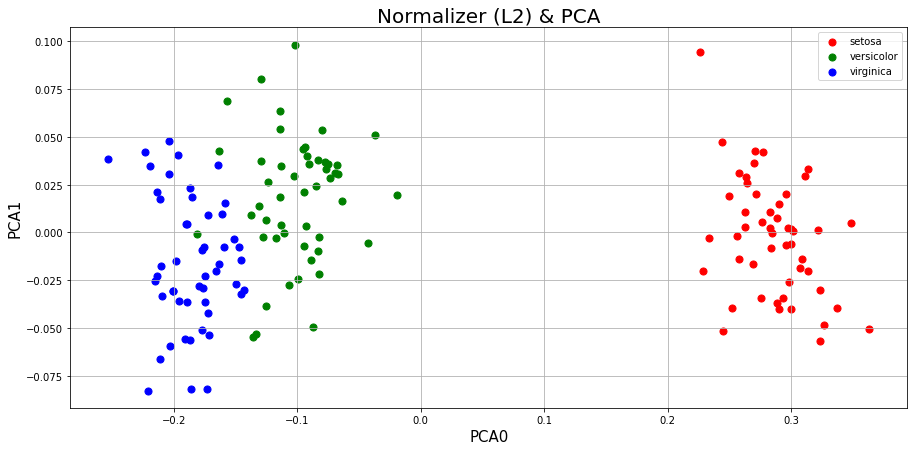

In [177]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('Normalizer (L2) & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_Normalizer_L2_PCA2['species'] == target
    ax.scatter(df_Normalizer_L2_PCA2.loc[indicesToKeep, 'PCA0'], df_Normalizer_L2_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Normalizer (max) & PCA</strong></p> 

In [178]:
%%time
x = Normalizer(norm='max').fit_transform(Xdf)

CPU times: total: 0 ns
Wall time: 1 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Resultado del Rescalamiento</strong></p> 

In [179]:
dfView = pd.DataFrame(data = x, columns = features).head()
dfView.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count           5.0        5.000         5.000        5.000
mean            1.0        0.675         0.289        0.041
std             0.0        0.039         0.021        0.002
min             1.0        0.612         0.275        0.039
5%              1.0        0.625         0.275        0.039
25%             1.0        0.674         0.277        0.040
50%             1.0        0.681         0.280        0.041
75%             1.0        0.686         0.286        0.043
95%             1.0        0.713         0.318        0.043
max             1.0        0.720         0.326        0.043

In [180]:
dfView.head()

sepal_length  sepal_width  petal_length  petal_width
0           1.0        0.686         0.275        0.039
1           1.0        0.612         0.286        0.041
2           1.0        0.681         0.277        0.043
3           1.0        0.674         0.326        0.043
4           1.0        0.720         0.280        0.040

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenamiento con el Dataset rescalado</strong></p> 

In [181]:
pca = PCA(n_components=iComponents)

In [182]:
%%time
pca_Components = pca.fit_transform(x)

CPU times: total: 15.6 ms
Wall time: 1.99 ms


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Generación del Dataset con la implementación del Rescalado y el PCA</strong></p> 

In [183]:
pca_Df = pd.DataFrame(data = pca_Components, columns=['PCA%i' % i for i in range(iComponents)])
df_Normalizer_max_PCA2 = pd.concat([pca_Df, df[['species']]], axis = 1)
df_Normalizer_max_PCA2.head()

PCA0   PCA1 species
0  0.406 -0.002  setosa
1  0.369  0.062  setosa
2  0.401  0.001  setosa
3  0.356 -0.003  setosa
4  0.413 -0.033  setosa

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Gráfica de las 2 nuevas características rescaladas, calculadas mediante PCA</strong></p> 

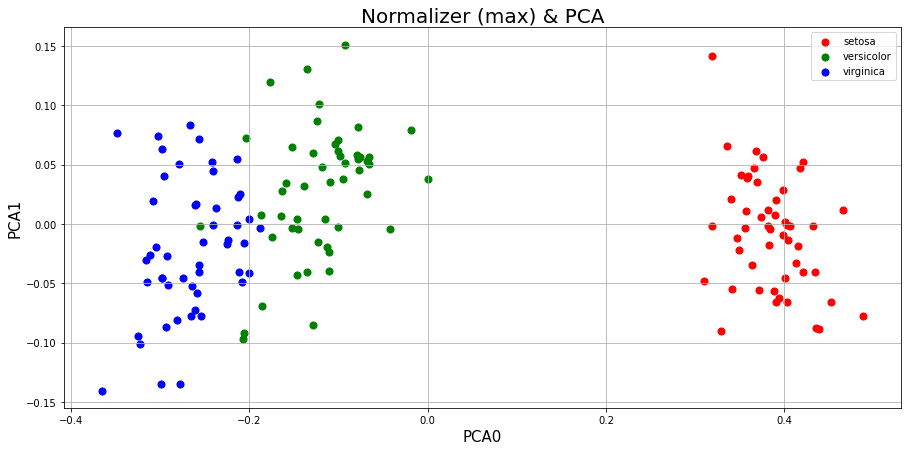

In [184]:
fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA0', fontsize = 15)
ax.set_ylabel('PCA1', fontsize = 15)
ax.set_title('Normalizer (max) & PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_Normalizer_max_PCA2['species'] == target
    ax.scatter(df_Normalizer_max_PCA2.loc[indicesToKeep, 'PCA0'], df_Normalizer_max_PCA2.loc[indicesToKeep, 'PCA1'], c=color, s=50)
    
ax.legend(targets)
ax.grid()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 